In [1]:
import pandas as pd

In [2]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
pd.set_option("display.max_columns", 200)

In [4]:
DATA_PATH = "/Users/asif/Desktop/NYC-restaurant-inspection-eda/data/raw/mydata.csv"

In [5]:
df = pd.read_csv(DATA_PATH, low_memory=False)

In [6]:
df.shape, df.columns[:15]

((294685, 27),
 Index(['CAMIS', 'DBA', 'BORO', 'BUILDING', 'STREET', 'ZIPCODE', 'PHONE',
        'CUISINE DESCRIPTION', 'INSPECTION DATE', 'ACTION', 'VIOLATION CODE',
        'VIOLATION DESCRIPTION', 'CRITICAL FLAG', 'SCORE', 'GRADE'],
       dtype='object'))

In [7]:
df.head(3)

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,Location
0,50165968,BAR CHUZO,Brooklyn,9324,3 AVENUE,11209.0,8089891321,NaN,01/01/1900,NaN,NaN,NaN,Not Applicable,NaN,NaN,NaN,12/29/2025,NaN,40.618413,-74.033132,310.0,43.0,5800.0,3155215.0,3.061060e+09,BK31,POINT (-74.033131508195 40.618412610578)
1,50176188,ATHENA KEKE'S,Brooklyn,222,GREENE AVENUE,11238.0,2026748866,NaN,01/01/1900,NaN,NaN,NaN,Not Applicable,NaN,NaN,NaN,12/29/2025,NaN,40.687138,-73.961988,302.0,35.0,23100.0,3056252.0,3.019660e+09,BK69,POINT (-73.96198807023 40.6871376384)
2,50176238,"ARAMARK SERVICES, INC",Manhattan,388,GREENWICH STREET,10013.0,7327785266,NaN,01/01/1900,NaN,NaN,NaN,Not Applicable,NaN,NaN,NaN,12/29/2025,NaN,40.720652,-74.010098,101.0,1.0,3900.0,1082816.0,1.002160e+09,MN24,POINT (-74.010097618713 40.720651658088)


In [8]:
df.info()
missing_pct = (df.isna().mean().sort_values(ascending=False) * 100).round(2)
missing_pct.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294685 entries, 0 to 294684
Data columns (total 27 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   CAMIS                  294685 non-null  int64  
 1   DBA                    294682 non-null  object 
 2   BORO                   294685 non-null  object 
 3   BUILDING               292608 non-null  object 
 4   STREET                 294667 non-null  object 
 5   ZIPCODE                291075 non-null  float64
 6   PHONE                  294678 non-null  object 
 7   CUISINE DESCRIPTION    291240 non-null  object 
 8   INSPECTION DATE        294685 non-null  object 
 9   ACTION                 291244 non-null  object 
 10  VIOLATION CODE         288957 non-null  object 
 11  VIOLATION DESCRIPTION  288957 non-null  object 
 12  CRITICAL FLAG          294685 non-null  object 
 13  SCORE                  278479 non-null  float64
 14  GRADE                  145222 non-nu

GRADE DATE               53.75
GRADE                    50.72
SCORE                     5.50
BIN                       1.95
VIOLATION CODE            1.94
VIOLATION DESCRIPTION     1.94
NTA                       1.52
Community Board           1.52
Census Tract              1.51
Council District          1.51
Location                  1.23
ZIPCODE                   1.23
CUISINE DESCRIPTION       1.17
ACTION                    1.17
INSPECTION TYPE           1.17
BBL                       0.76
BUILDING                  0.70
Latitude                  0.46
Longitude                 0.46
STREET                    0.01
dtype: float64

### Data Structure and Missing Values
The dataset contains 294,685 restaurant inspection records across 27 variables.
Most location and identification fields are nearly complete, while several
outcome-related fields show substantial missingness.

Notably, `GRADE` and `GRADE DATE` are missing for approximately half of the
records. This likely reflects inspections that did not result in a final grade,
such as reinspections, follow-up visits, or inspections that led directly to
administrative actions. The `SCORE` field is missing for about 5.5% of records,
suggesting that not all inspections receive a numerical score.

Violation-related fields (`VIOLATION CODE` and `VIOLATION DESCRIPTION`) have
relatively low missingness (~2%), indicating that most inspection records
include detailed violation information. These patterns suggest that outcome
variables will require careful handling during data cleaning and analysis.

In [9]:
df.duplicated().sum()

np.int64(6)

In [10]:
for col in ["GRADE", "CRITICAL FLAG"]:
    print("\n", col)
    print(df[col].value_counts(dropna=False))


 GRADE
GRADE
NaN    149463
A       98101
B       18490
C       13297
N        8932
Z        5494
P         908
Name: count, dtype: int64

 CRITICAL FLAG
CRITICAL FLAG
Critical          155706
Not Critical      131458
Not Applicable      7521
Name: count, dtype: int64


In [11]:
df["INSPECTION DATE"] = pd.to_datetime(df["INSPECTION DATE"], errors="coerce")
df["INSPECTION DATE"].min(), df["INSPECTION DATE"].max()

(Timestamp('1900-01-01 00:00:00'), Timestamp('2025-12-28 00:00:00'))

### Inspection Date Range and Anomalies
Inspection dates in the dataset range from January 1, 1900 to December 28, 2025.
The 1900 date is not a plausible inspection year and likely represents a
placeholder or default value used when inspection dates were missing or
improperly recorded.

These anomalous records will be excluded or treated as missing during the
cleaning phase to ensure that time-based analyses reflect valid inspection
activity.

In [12]:
df.shape

(294685, 27)

In [13]:
df = df.drop_duplicates()
df.shape

(294679, 27)

### Duplicate Records
Six fully duplicated rows were identified and removed. Given the negligible number of duplicates relative to the dataset size, this step does not materially ffect the analysis but ensures data consistency.

In [14]:
df.loc[df["INSPECTION DATE"].dt.year == 1900, "INSPECTION DATE"] = pd.NaT

In [15]:
df["INSPECTION DATE"].min(), df["INSPECTION DATE"].max()

(Timestamp('2008-09-25 00:00:00'), Timestamp('2025-12-28 00:00:00'))

### Inpection Date Cleaning
After cleaning, valid inspection dates span from Sep 2008 through Dec2025, reflecting the period during which the NYC inspection program records are available in this dataset.

In [16]:
df["inspection_year"] = df["INSPECTION DATE"].dt.year
df["inspection_month"] = df["INSPECTION DATE"].dt.month
df["inspection_dayofweek"] = df["INSPECTION DATE"].dt.day_name()

In [17]:
df[["INSPECTION DATE", "inspection_year", "inspection_month", "inspection_dayofweek"]].head()

,INSPECTION DATE,inspection_year,inspection_month,inspection_dayofweek
0,NaT,NaN,NaN,NaN
1,NaT,NaN,NaN,NaN
2,NaT,NaN,NaN,NaN
3,NaT,NaN,NaN,NaN
4,NaT,NaN,NaN,NaN


### Time-Based Feature Engineering
To support temporal analysis, inspection dates were used to derive year, month,
and day-of-week features. These variables enable the examination of seasonal
patterns and inspection trends over time.

In [18]:
df[df["INSPECTION DATE"].notna()][
    ["INSPECTION DATE", "inspection_year", "inspection_month", "inspection_dayofweek"]
].head()

,INSPECTION DATE,inspection_year,inspection_month,inspection_dayofweek
11,2023-09-01,2023.0,9.0,Friday
14,2024-09-09,2024.0,9.0,Monday
18,2024-03-07,2024.0,3.0,Thursday
20,2023-06-12,2023.0,6.0,Monday
22,2025-06-18,2025.0,6.0,Wednesday


Some inspection records do not contain valid inspection dates and therefore
lack derived time-based features. These rows are retained for analyses that do
not require temporal information and are excluded from time-based analyses as
needed.

In [19]:
valid_grades = ["A", "B", "C"]
df["has_valid_grade"] = df["GRADE"].isin(valid_grades)
df["is_poor_grade"] = df["GRADE"].isin(["B", "C"])


In [20]:
df["has_valid_grade"].value_counts()
df["is_poor_grade"].value_counts(dropna=False)

is_poor_grade
False    262892
True      31787
Name: count, dtype: int64

### Poor Inspection Outcome Indicator
A binary indicator was created to flag poor inspection outcomes, defined as grades B or C. Approximately 10% of inspection records fall into this category, while the majority of inspections receive either an A grade or no final grade. This imbalance reflects real-world inspection outcomes and motivates comparative analysis across boroughs, cuisines, and violation severity.

In [21]:
df["GRADE"].isin(["B", "C"]).sum()

np.int64(31787)

In [22]:
df["SCORE"].describe()

count    278473.000000
mean         25.105741
std          18.780685
min           0.000000
25%          12.000000
50%          21.000000
75%          33.000000
max         203.000000
Name: SCORE, dtype: float64

In [23]:
df.loc[df["SCORE"] < 0, "SCORE"] = pd.NA

### Inspection Score Distribution
Inspection scores are available for the majority of records, with a median score of 21 and a mean of approximately 25. Scores exhibit substantial variability and are likely right-skewed, with a small number of inspections receiving extremely high scores. These outliers may reflect particularly severe violations and will be examined further during visualization.

In [24]:
df["is_critical_violation"] = df["CRITICAL FLAG"] == "Critical"

In [25]:
df.groupby("CAMIS")["is_critical_violation"].sum().head()

CAMIS
30075445    10
30191841     6
40356018     1
40356483    11
40356731     2
Name: is_critical_violation, dtype: int64

### Critical Violations by Restaurant

Inspection records were grouped by restaurant to calculate the total number of critical violations for each establishment. This allows us to identify repeat violations over time and explore whether restaurants with more critical violations are more likely to receive poor inspection outcomes.

In [27]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


<Axes: xlabel='GRADE'>

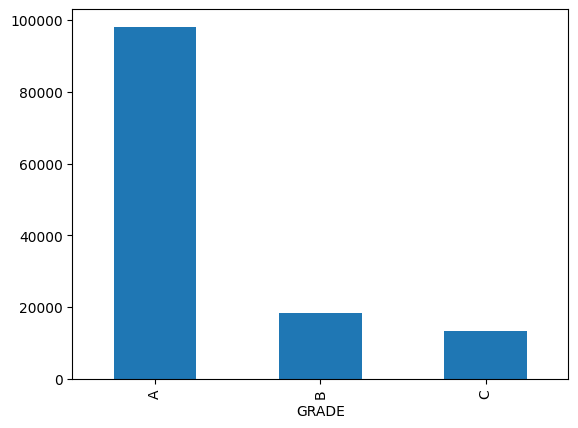

In [28]:
df[df["GRADE"].isin(["A", "B", "C"])]["GRADE"].value_counts().plot(kind="bar")

This bar chart shows how often restaurants receive A, B, or C grades. Most graded inspections result in an A, while B and C grades are less common.

<Axes: ylabel='Frequency'>

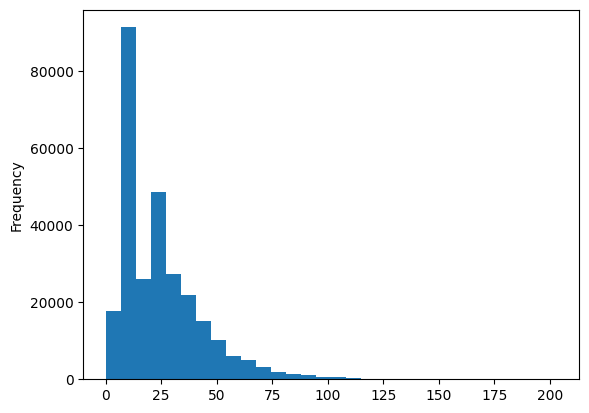

In [29]:
df["SCORE"].dropna().plot(kind="hist", bins=30)

This histogram shows the distribution of inspection scores. Most scores are relatively low, but a small number of inspections receive very
high scores, which may indicate more serious issues.

## Key Findings

- Most graded inspections result in an A, while B and C grades are relatively uncommon.
- Approximately 10% of graded inspections receive a poor outcome (B or C).
- Inspection scores are generally low, but a small number of inspections have very high scores, indicating more serious violations.
- Many inspection records do not have a final grade, suggesting that not all inspections lead to an immediate grading outcome.

## Limitations and Next Steps

This analysis is exploratory and based on observational data, so no causal conclusions can be drawn. Some inspection records lack grades or valid inspection dates, which limits certain analyses.

With more time, this project could be extended by examining trends over time, comparing outcomes across boroughs or cuisines, or building a simple predictive model for poor inspection outcomes.

**Note:** The raw dataset is not included in this repository due to file size constraints. To run this notebook locally, download the CSV from NYC Open Data and update the file path accordingly.